# Exploratory Data Analysis of Top Rated IMDB Movies

## Introduction

IMDB is an online database of information relating to Movies, TV Shows, Video Games & Web Series. As of March 2022, the database contained some 11 million titles (including television episodes) and 11.7 million person records. In this pipeline we will be looking at Top 1000 Movies from the IMDB Database.

The dataset we will be using is taken from Kaggle and contains information about Top rated 1000 movies based on IMDB ratings.
The dataset also contains other features, which are as follows,

***Poster Link = Link of the poster that imdb using***

***Series Title = Name of the movie***

***Released Year = Year at which that movie released***

***Certificate = Certificate earned by that movie***

***Runtime = Total runtime of the movie***

***Genre = Genre of the movie***

***IMDB Rating = Rating of the movie at IMDB site***

***Overview = mini story/ summary***

***Meta score =  Score earned by the movie***

***Director = Name of the Director***

***Star1, Star2, Star3, Star4 - Name of the Stars***

***No. of votes = Total number of votes***

***Gross = Money earned by that movie***

## Importing Libraries

In [67]:
#import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [68]:
df = pd.read_csv('imdb.csv')
df = df.drop('Poster_Link', axis = 1)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Data Preprocessing

### Data Cleaning

Looking for the Null values and Removing them from the Dataset

In [69]:
print(df.info())

print(df.isna().sum())

df = df.dropna()

print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.3+ KB
None
Series_Title       0
Released_Year      0
Certificate      101
Runtime      

Looking at the data information we see that we will have to change the dtypes of ***Released Year, Gross and Runtime*** from object to float values so that we can plot them in data visulization phase of this pipeline

### Data Transformation

Let's look at the Released Year column,

In [70]:
pd.set_option('display.max_rows', 800)

df['Released_Year'].value_counts()

2014    28
2004    27
2001    24
2009    23
2013    22
2006    21
2007    21
2016    20
2003    19
1993    19
2015    18
2010    18
2002    18
2017    18
2008    17
1999    17
1998    16
2000    16
2019    15
1995    14
2012    14
2011    14
2005    14
1997    13
2018    12
1987    12
1994    12
1991    11
1992    10
1982    10
1973    10
1979    10
1989     9
1996     8
1984     8
1986     8
1985     8
1990     8
1988     7
1971     7
1964     6
1980     6
1974     5
1960     5
1976     5
1951     4
1983     4
1981     4
1954     4
1978     4
1959     4
1972     4
1967     4
1968     4
1975     4
1969     3
1940     3
1963     3
1965     3
1958     3
1962     3
1970     3
1977     3
1939     3
1957     2
1966     2
1946     2
1961     2
1952     2
1930     1
1938     1
1933     1
PG       1
1944     1
1934     1
1949     1
1948     1
1950     1
1941     1
1931     1
1936     1
1942     1
1953     1
Name: Released_Year, dtype: int64

Looking at the above values from Released Year column, we notice that one of the Year has been misclassified as PG, instead of a year. Let's see which movie is misclassified,

In [71]:
df.loc[df['Released_Year']=='PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


So, here it says that the movie Apollo has been misclassified, lets change the PG to the year the movie was released, that is, the year 1995.

In [72]:
df = df.reset_index()
df = df.drop('index', axis =1)
df.iat[686, 1] = '1995'
df.loc[df['Series_Title']== 'Apollo 13']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
686,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


now that the data has ben corrected, we can move on to transforming the dtypes of ***Released Year, Gross and Runtime*** columns.

In [73]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Gross'].apply(pd.to_numeric)

df['Released_Year'] = df['Released_Year'].astype(int)

df['Runtime']=df['Runtime'].str.replace(' min','')
df['Runtime']=df['Runtime'].astype(str).astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    int64  
 2   Certificate    714 non-null    object 
 3   Runtime        714 non-null    int64  
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Overview       714 non-null    object 
 7   Meta_score     714 non-null    float64
 8   Director       714 non-null    object 
 9   Star1          714 non-null    object 
 10  Star2          714 non-null    object 
 11  Star3          714 non-null    object 
 12  Star4          714 non-null    object 
 13  No_of_Votes    714 non-null    int64  
 14  Gross          714 non-null    float64
dtypes: float64(3), int64(3), object(9)
memory usage: 83.8+ KB
None


With that, we are done with Data Preprocessing, and can move onto the Data Exploration.

## Data Exploration

### Setting Styling Parameters

In [182]:
sns.set_style('darkgrid');
sns.set_context(context='paper', font_scale=1);

### Which movie is the highest grossing movie in this dataset?

In [227]:
h_price = df.loc[df['Gross'].idxmax()]
print('The Highest Grossing Movie is: ', h_price['Series_Title'])

The Highest Grossing Movie is:  Star Wars: Episode VII - The Force Awakens


### Which Year had the most IMDB top 1000 entries?

In [180]:
year = df['Released_Year'].value_counts()
year_max = year.idxmax()
year_count = year.max()
print('The year with highest number of entries in IMDB top 1000 is', year_max, 'with', year_count,) 

The year with highest number of entries in IMDB top 1000 is 2014 with 28


##### Top 5 Years with most movies in IMDB top 1000

Years with highest number of IMDB top 1000 entries other then 2014, are as follow:

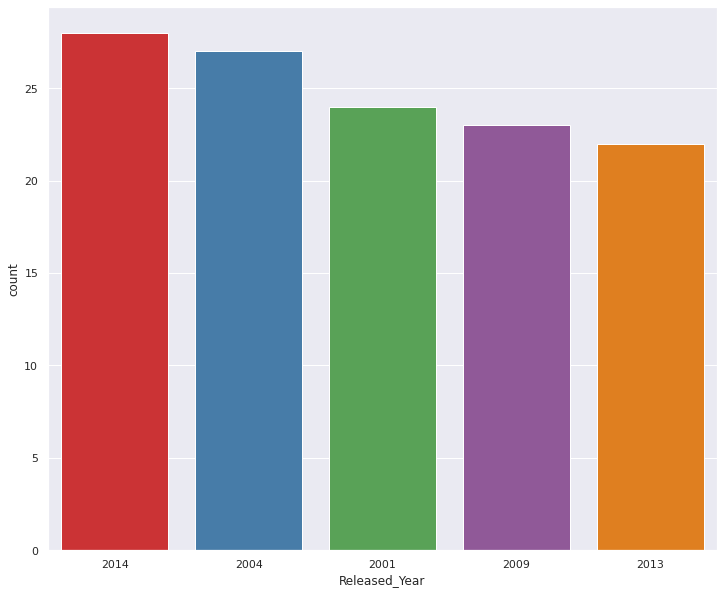

In [191]:
plt.figure(figsize=(12,10))
year_1 = sns.countplot(x="Released_Year", data=df, palette="Set1", order=df['Released_Year'].value_counts().index[0:5])

### Top 5 Directors by number of movies in IMDB top 1000

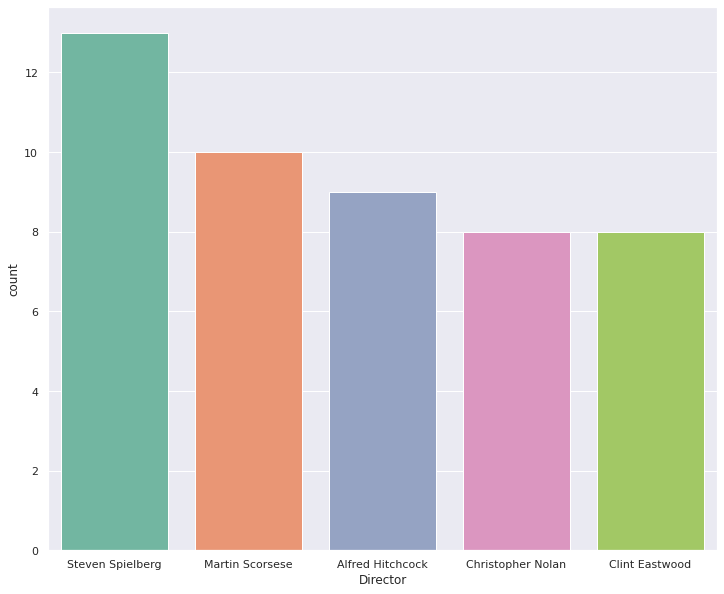

In [185]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Director", data=df, palette="Set2", order=df['Director'].value_counts().index[0:5])

Here, we can see the top 5 Directors, from thess results we can see that ***Steven Spielberg*** is most highly rated director.

### Average Runtime of Movies

Let's look at the average run time of top rated movies.

<AxesSubplot:xlabel='Runtime', ylabel='Density'>

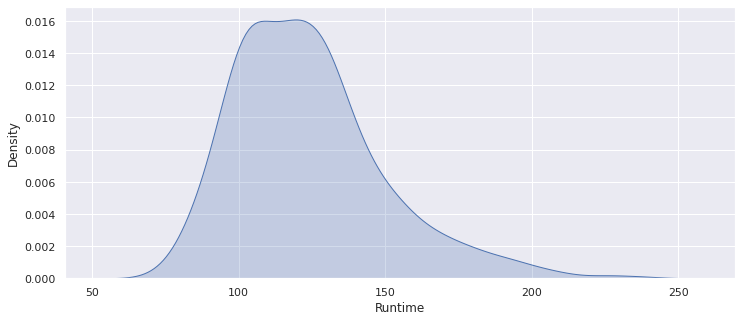

In [187]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df['Runtime'], shade=True)

Here we can see that on average an IMDB top 1000 Movie has a runtime of 120 to 125 minutes.

### Relation between IMDB Rating and Gross Amount

Observing the Trend betweeb the Ratings and Amount earned. To see if there is a relationship between these two features.

<Figure size 864x720 with 0 Axes>

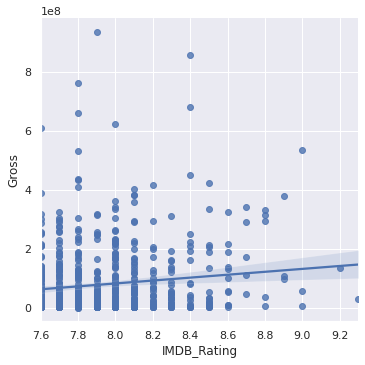

In [190]:
plt.figure(figsize=(12,10))
sns.lmplot(data = df, x = 'IMDB_Rating', y = 'Gross')

Plotting lmplot on the two features, we can see that the line of linear regression has very very low gradient and we can come to the conclusion that there is not a strong relation between the two features, which means that being a high rated movie at IMDB does not guarantees that a Movie will do good business.

### Distribution of Certificates

Let's see how the certificates are distributed in our dataset, but before we can dive into the certificate distribution we need to first clean sum data regarding the certificate. Some certificates mean the same thing but are assigned a different value so will start by folding them into eachother, and convert them to a standard Motion Pictures Rating System.

In [273]:
df.loc[df['Certificate']=='U/A'] = 'PG'
df.loc[df['Certificate']=='UA'] = 'PG'
df.loc[df['Certificate']=='A'] = 'R'
df.loc[df['Certificate']=='U'] = 'G'
df.loc[df['Certificate']=='Approved'] = 'Passed'
df.loc[df['Certificate']=='TV-PG'] = 'PG'
df.loc[df['Certificate']=='GP'] = 'PG'
df.loc[df['Certificate']=='TV-14'] = 'PG-13'
df.loc[df['Certificate']=='16'] = 'R'
df.loc[df['Certificate']=='TV-MA'] = 'R'
df.loc[df['Certificate'].isna()] = 'Unrated'

Now that we have merged the similar certificates, now we can plot them on a pie chart and visualize their distribution.

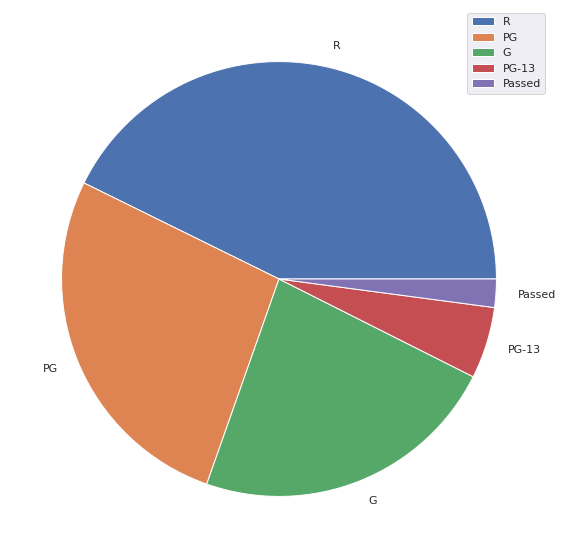

In [274]:
plt.figure(figsize=(12,10))
data = df['Certificate'].value_counts()
lab = df['Certificate'].unique()
plt.pie(data, labels = lab )
plt.legend()
plt.show()

To decipher what the pie chart describes, we will have understand the meanings off all these certificates,
***R*** means restricted, children under 17 require accompanying parent or adult guardian. ***PG*** means parental guidance suggested, some material may not be suitable for children. **PG-13** means parents strongly cautioned, some material may be
inappropriate for children under 13. ***G*** means General Audiences, all ages admitted . ***Passed*** is a certificate given to movies before they had a rating system.


From the above chart we can see that most of the top rated movies on IMDB have a ***R*** certificate.

# Conclusion

In the pipeline above we have seen how different features of Movies, such as, Genre, Runtime, Certificate etc. effect their earnings and ratings.

# Reference

https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

https://www.imdb.com/pressroom/stats/

https://www.filmratings.com/Content/Downloads/rating_rules.pdf